In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/diabetes.csv')

In [ ]:
df.shape

(768, 9)

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [ ]:
x_scaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state=0)

In [ ]:
x_train.shape

(576, 8)

In [ ]:
x_scaled.shape

(768, 8)

In [ ]:
x_test.shape

(192, 8)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report


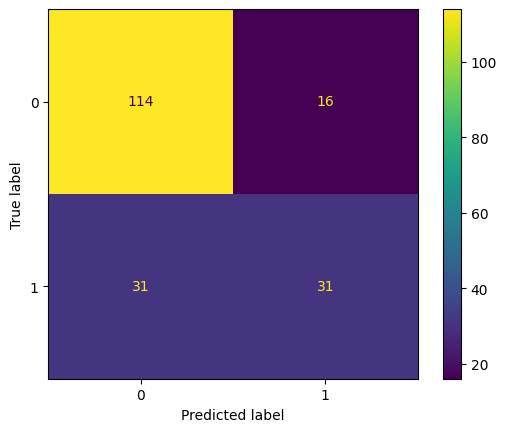

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       130
           1       0.66      0.50      0.57        62

    accuracy                           0.76       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
error=[]

In [ ]:
for k in range(1,41):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  pred=knn.predict(x_test)
  error.append(np.mean(pred != y_test))


In [ ]:
error

[0.328125,
 0.2708333333333333,
 0.24479166666666666,
 0.2708333333333333,
 0.24479166666666666,
 0.2552083333333333,
 0.234375,
 0.24479166666666666,
 0.21875,
 0.24479166666666666,
 0.22916666666666666,
 0.22916666666666666,
 0.22395833333333334,
 0.234375,
 0.23958333333333334,
 0.21875,
 0.21354166666666666,
 0.22916666666666666,
 0.22916666666666666,
 0.22395833333333334,
 0.21875,
 0.22395833333333334,
 0.22395833333333334,
 0.22916666666666666,
 0.234375,
 0.22916666666666666,
 0.22395833333333334,
 0.21875,
 0.22395833333333334,
 0.21354166666666666,
 0.22395833333333334,
 0.22916666666666666,
 0.20833333333333334,
 0.22916666666666666,
 0.22916666666666666,
 0.234375,
 0.22395833333333334,
 0.22916666666666666,
 0.22395833333333334,
 0.22395833333333334]

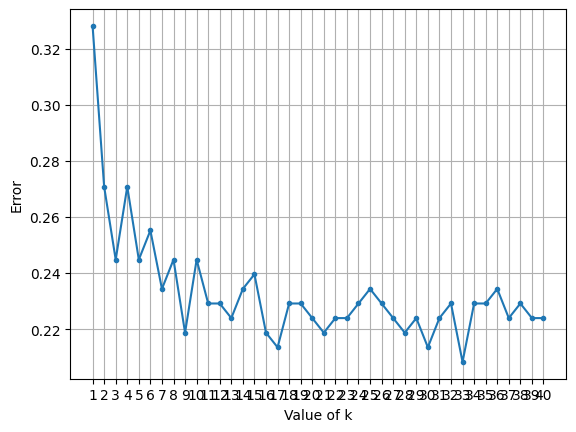

In [ ]:
plt.xlabel('Value of k')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41),error,marker='.')


In [ ]:
knn=KNeighborsClassifier(n_neighbors=33)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=33)

In [ ]:
y_pred=knn.predict(x_test)

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       130
           1       0.79      0.48      0.60        62

    accuracy                           0.79       192
   macro avg       0.79      0.71      0.73       192
weighted avg       0.79      0.79      0.78       192

